# Homework 2: Exploring & Visualizing Data

In [6]:
import keras
import numpy as np

from keras.models import Sequential

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Part 1: Data Exploration

## Setup

Make sure you have seaborn and missingno installed. Run `pip3 install seaborn` and `pip3 install missingno` in your container/shell if you don't.

In this homework, we will more rigorously explore data visualization and data manipulation with a couple datasets. Please fill in the cells with `## YOUR CODE HERE` following the appropriate directions.

In [7]:
# removes the need to call plt.show() every time
%matplotlib inline

Seaborn is a powerful data visualization library built on top of matplotlib. We will be using seaborn for this homework (since it is a better tool and you should know it well). Plus seaborn comes default with *much* better aesthetics (invoked with the `set()` function call).

In [8]:
import missingno as msno
import seaborn as sns
sns.set()

Import `numpy` and `pandas` (remember to abbreviate them accordingly!)

In [9]:
## YOUR CODE HERE
import numpy as np
import pandas as pd

## Getting to know a new dataset

First load the `titanic` dataset directly from seaborn. The `load_dataset` function will return a pandas dataframe.

In [31]:
titanic = sns.load_dataset('titanic')
sns.get_dataset_names()

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/alfredoanderejr/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

Now use some pandas functions to get a quick overview/statistics on the dataset. Take a quick glance at the overview you create.

In [17]:
## YOUR CODE HERE
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
## YOUR CODE HERE
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


With your created overview, you should be able to answer these questions:

## Part 1: Sentiment Classification

In this problem we will use IMDB movie review sentiment dataset. These sentences are movie reviews, so the sentiment (label) reflects whether its a 'positive' review or a 'negative' review. 

import

In [20]:
import pandas as pd

num_words = 2000
maxlen = 200

#Download the 
imdb = pd.read_csv('IMDB_Dataset.csv')

imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


We have to process the data first, so that we have fixed length sequences.

<b>We want to split the dataset into classes and labels. Use the toBinary function you created earlier to tranform the sentiment column into binary, 1 for positive and 0 for negative. </b>

In [ ]:
imdb_x = imdb['review']
imdb_y = imdb['sentiment']

imdb_y = toBinary(imdb_y, 'positive')

# print row contents
imdb.head()

50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


"Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors."
    https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

Lemmatize the sentences using any library from the article.

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer 

def Lemmatize(data):
    # Init the Wordnet Lemmatizer
    data = data.str.split(" |,|<br /><br />|\"|\'|!")
    lemmatizer = WordNetLemmatizer() # Erase
    for i in range(data.shape[0] - 1, -1, -1):
        sentence = data.iloc[i]
        for j in range(len(sentence)):
            old_word = ''.join(filter(str.isalpha, sentence[j])) # Deletes all non alphabetical chars
            sentence[j] = lemmatizer.lemmatize(old_word) # Partially erase

                
        data.iloc[i] = sentence
    return data

imdb_x = Lemmatize(imdb_x)

The data has to be put into integer form, so each integer represents a unique word, 0 represents a PAD character, 1 represents a START character and 2 represents a character that is unknown because it is not in the top `num_words`. 
Thus 3 represents the first real word. 

Also the words should be in decreasing order of commonness, so the word that 3 represents is the most common word in the dataset. 

Complete StringToInt which will take in a data column <br>
    1) Create a Dict that maps {Word: Apperances in dataset} <br>
    2) Choose the top N most recurring words and give ascending indexes starting at 3 <br>
    3) Replace known words with their index, unknown words with a 2, and start sentences with a 1 

In [ ]:
def CreateDict(data, topN):

    wordCounter = {}
    for i in range(data.shape[0] - 1, -1, -1):
        sentence = data.iloc[i]
        for j in range(len(sentence)):
            if sentence[j] in wordCounter:
                wordCounter[sentence[j]] = wordCounter[sentence[j]] + 1
            else:
                wordCounter[sentence[j]] = 1
            
    wordCounter = sorted(wordCounter.items(), key=lambda x: x[1], reverse=True)[:topN]
    
    counter = 2 # HACK, start at 2 to replace empty strings (the most common) with 2
    for i in range(len(wordCounter)):
        wordCounter[i] = wordCounter[i][0:1] + (counter,)
        counter += 1
        
    return dict(wordCounter)
    
wordCounter = CreateDict(imdb_x, 1000)


In [ ]:
def replaceByIndex(data, wordCounter):
    for i in range(data.shape[0] - 1, -1, -1):
        sentence = data.iloc[i]
        for j in range(len(sentence)):
            if sentence[j] in wordCounter:
                sentence[j] = wordCounter[sentence[j]]
            else:
                sentence[j] = 2
    return data  

imdb_x = replaceByIndex(imdb_x, wordCounter)

In [ ]:
imdb_x.head()

#### We want to process the data into arrays of sequences that are all length 200. If a given sequence is shorter than 200 tokens we want to pad the rest of the sequence out with zeros so that the sequence is 200 long.

In [ ]:
def process_data(data):
    processed = np.zeros(len(data) * 200).reshape((len(data), 200))
    for i, seq in enumerate(data):
        seq = np.asarray([1] + seq)
        # seq = np.concatenate(np.asarray([1]), seq)
        if len(seq) < 200:
            processed[i] = np.pad(data[i], [0, 200 - len(seq)], 'constant') # PAD SEQUENCES WITH ZEROS HERE
        else:
            processed[i] = np.array(seq)[0:200]
    return processed

imdb_x = process_data(imdb_x)

In [ ]:
# separate the dataset into train and test


In [143]:
x_train_proc = process_data(imdb)
#x_test_proc = process_data(x_test)

In [6]:
imdb_model = Sequential()

Now we want to add an embedding layer. The purpose of an embedding layer is to take a sequence of integers representing words in our case and turn each integer into a dense vector in some embedding space. (This is essentially the idea of Word2Vec). We want to create an embedding layer with vocab size equal to the max num words we allowed when we loaded the data (in this case 1000), and a fixed dense vector of size 32. Then we have to specify the max length of our sequences and we want to mask out zeros in our sequence since we used zero to pad.
Use the docs for embedding layer to fill out the missing entries: https://keras.io/layers/embeddings/

In [7]:
from keras.layers.embeddings import Embedding
imdb_model.add(Embedding(2000, 32, input_length=200, mask_zero=True))

#### **(a)** We add an LSTM layer with 32 outputs, then a Dense layer with 16 neurons, then a relu activation, then a dense layer with 1 neuron, then a sigmoid activation. Then you should print out the model summary. The Keras documentation is here: https://keras.io/

In [8]:
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Activation
imdb_model.add(LSTM(32))

In [9]:
imdb_model.add(Dense(units=16, activation='relu'))
imdb_model.add(Dense(units=1, activation='sigmoid'))

In [10]:
imdb_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 72,865
Trainable params: 72,865
Non-trainable params: 0
_________________________________________________________________


### running `imdb_model.summary()` should give you the following output.

#### **(b)** Now compile the model with binary cross entropy, and the adam optimizer. We include accuracy as a metric in the compile. Then train the model on the processed data.

In [11]:
imdb_model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['acc'])

In [12]:
imdb_model.fit(x_train_proc, y_train)

Epoch 1/1
25000/25000 [==============================] - 272s 11ms/step - loss: 0.3793 - acc: 0.8253


In [13]:
print("Accuracy: ", imdb_model.evaluate(x_test_proc, y_test)[1])

3913/3913 [==============================] - 10s 2ms/step
Accuracy:  0.8773319703856911


#### Now we can look at our predictions and the sentences they correspond to.

In [14]:
y_pred = imdb_model.predict(x_test_proc)

In [15]:
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items() if value < 2000}
def get_words(token_sequence):
    return ' '.join(id_to_word[token] for token in token_sequence)

def get_sentiment(y_pred, index):
    return 'Positive' if y_pred[index] else 'Negative'

In [16]:
y_pred = np.vectorize(lambda x: int(x >= 0.5))(y_pred)
correct = []
incorrect = []
for i, pred in enumerate(y_pred):
    if y_test[i] == pred:
        correct.append(i)
    else:
        incorrect.append(i)

#### Now we print out one of the sequences we got correct.

In [17]:
print(get_sentiment(y_pred, correct[10]))
print(get_words(x_test[correct[10]]))

Negative
<START> don't tell me this film was funny or a little funny it was a complete disaster and one of the worst movies i've ever seen <UNK> g is only funny on channel <UNK> <UNK> g show after watching his performance all i can say is he is not made for movies with a <UNK> script or more like no storyline there's nothing to keep you <UNK> full of annoying <UNK> character's this movie is a complete garbage all the way at the end of the film <UNK> g gives a <UNK> he <UNK> if you hated this film tell people it was good not even the <UNK> could save the movie he probably knew its <UNK> be a <UNK> i would of given this a <UNK> 10 but the <UNK> start is 1 overall don't even waste your time on this rubbish


#### And one we got wrong.

In [18]:
print(get_sentiment(y_pred, incorrect[10]))
print(get_words(x_test[incorrect[10]]))

Negative
<START> this <UNK> as my favorite movie of all time it's the best <UNK> of a science fiction movie ever the fact that it was a <UNK> of star wars just made it all the better br br i love <UNK> think of this as the <UNK> brothers or the three <UNK> meet star wars the writing is hilarious the effects are a <UNK> the free <UNK> that goes on <UNK> all <UNK> of things coming out of left field i almost <UNK> my <UNK> when the <UNK> monster <UNK> the <UNK> br br space <UNK> was a much longer movie but only had about 15 minutes of good material in it and i felt sort of <UNK> off <UNK> like <UNK> a <UNK> that turned out to be mostly <UNK> <UNK> wars despite being only about 15 minutes long would be worth <UNK> a feature price <UNK>


#### As you can see the amount of UNKNOWN characters in the sequence cause by having only 1000 vocab words is hurting our performance. See if you can go through and increase the number of vocab words to 2000. HINT: you have to change two places in the above code.

## Embedding Exploration
#### Another interesting thing to do is see if our learned embeddings mean anything reasonable.

In [19]:
from keras import backend as K

In [20]:
# this function takes a list of token sequences as inputs 
# and outputs the corresponding vector outputs of our `Embedding` layer
embedding_func = K.function([imdb_model.inputs[0]], [imdb_model.layers[0].output])

In [21]:
# this function outputs the embedding of a given word using above function
def word_to_embedding(word):
    token = word_to_id[word]
    seq = [token]
    sequences = [seq]
    inputs = [process_data(sequences)]
    embedding = embedding_func(inputs)
    return embedding[0][0][0]

In [22]:
valid_words = [word for word, token in word_to_id.items() if token < 1000]

In [23]:
valid_word_embeddings = {word: word_to_embedding(word) for word in valid_words}

Since we used an embedding layer with an output size of 32, our embeddings are going to be 32-dimensional vectors. Humans can't effectively visualize beyond 3 (maybe 4) dimensions so we want to use a dimensionality reduction technique to make our embeddings more visualizable. One such technique is Principal Component Analysis or PCA. The library scikit-learn provides an easy to use API for this technique.

In [24]:
import sklearn
from sklearn import decomposition

#### using the documentation for scikit-learn's PCA [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): create a PCA object with `n_components=2`

In [25]:
pca = decomposition.PCA(n_components=2)

#### using the same documentation find the function to fit the PCA transform to the provided embedding vectors. This step essentially. For the curious, this step essentially finds the 2 dimensions (since we specified `n_components=2` that explain the most variance of the dataset, in other words the two dimensions that are most representative of the deviations of any one sample to another. So these 2 dimensions are the most important and therefore the best to visualize.

In [26]:
vectors_to_fit = valid_word_embeddings.values()
pca.fit(list(vectors_to_fit))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Now we want to visualize our embeddings in these new PCA dimensions, so using the same documentation from above fill out the missing spots in the code below to transform the embeddings into the pca dimensions.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
def get_pca_words(words):
    embeddings = [valid_word_embeddings[word] for word in words]
    pcas = [pca.transform(embedding.reshape(1, -1)) for embedding in embeddings]
    return pcas

def plot_pca_words(words, scale=1):
    pcas = get_pca_words(words)
    zeros = [0 for _ in pcas]
    x_start = zeros
    y_start = zeros
    xs = [p[0, 0] for p in pcas]
    ys = [p[0, 1] for p in pcas]
    plt.quiver(x_start, y_start, xs, ys, scale=scale)
    plt.show()

#### Now using the above functions we can plot the corresponding pca vectors of any words we like. Below are some good examples of pairs of words that are similar within the movie review context and their corresponding vectors are also similar. **This is a good sign.** This means the embedding we have learned is likely doing something somewhat reasonable.

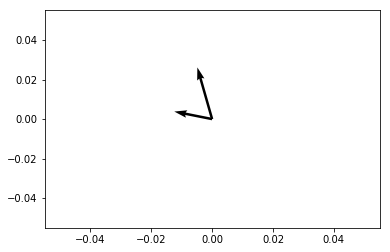

In [28]:
plot_pca_words(['film', 'entertainment'], scale=0.5)

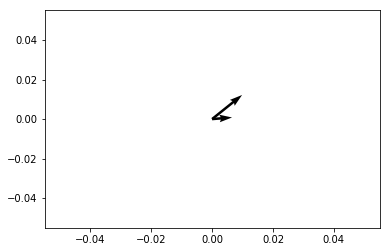

In [29]:
plot_pca_words(['man', 'woman'])

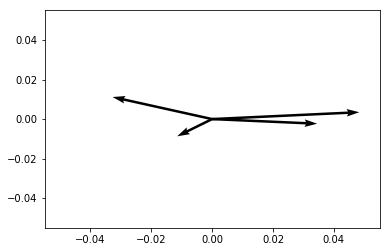

In [30]:
plot_pca_words(['good', 'bad', 'horrible', 'great'], scale=2)

#### Now find 2 more pairs of words that are similar in PCA'd embedding space. 

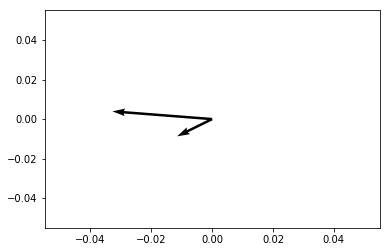

In [31]:
plot_pca_words(['brilliant', 'good'], scale=2)

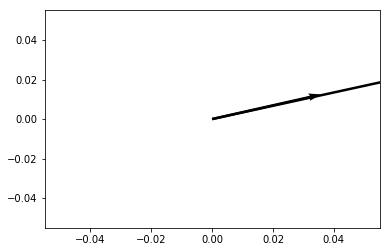

In [32]:
plot_pca_words(['annoying', 'worst'], scale=2)

#### Given that the task we learned these embeddings for was sentiment classification, the embeddings are typically more meaningful for adjectives. Write a sentence or two about why you think this last statement makes sense intuitively.

#TODO see above

> It makes sense that the most meaningfull embeddings are the adjectives because those are what the network should 
be looking out for. It is analyzing moview reviews and therefore the most meaningfull and expressive words are going to be the adjectives.

#### Now just for fun we can write a function that gives us the 10 closest words to a provided word.

In [33]:
def word_to_angle(word):
    p = pca.transform(valid_word_embeddings[word].reshape(-1, 1))
    return np.arctan(p[0, 1] / p[0, 0])
valid_word_angles = [word_to_angle(word) for word in valid_words]

In [34]:
def find_closest_n(value, n):
    indices = np.argsort(np.abs(np.array(valid_word_angles) - value))
    return [(valid_words[ind], valid_word_angles[ind]) for ind in indices[:n]]

In [35]:
find_closest_n(word_to_angle('terrible'), 10)

[('terrible', 0.6688189403025202),
 ('awful', 0.668820873200729),
 ('boring', 0.6688103973564853),
 ('fails', 0.6688353153057366),
 ('stupid', 0.6687821107155689),
 ('waste', 0.6687758525082359),
 ('poorly', 0.6687579806930346),
 ('lame', 0.6687412092241101),
 ('worst', 0.6689009985901717),
 ('worse', 0.6687332281420252)]

* What was the age of the oldest person on board? 80
* What was the survival rate of people on board? .383
* What was the average fare of people on board? 32.20

By the way, for getting overviews, pandas also has a `groupby` function that is quite nice to use. example:

In [7]:
titanic.groupby(['sex','embark_town'])['survived'].mean()

sex     embark_town
female  Cherbourg      0.876712
        Queenstown     0.750000
        Southampton    0.689655
male    Cherbourg      0.305263
        Queenstown     0.073171
        Southampton    0.174603
Name: survived, dtype: float64

Now we have an overview of our dataset. The next thing we should do is clean it - check for missing values and deal with them appropriately.

`missingno` allows us to really easily see where missing values are in our dataset. It's a simple command:

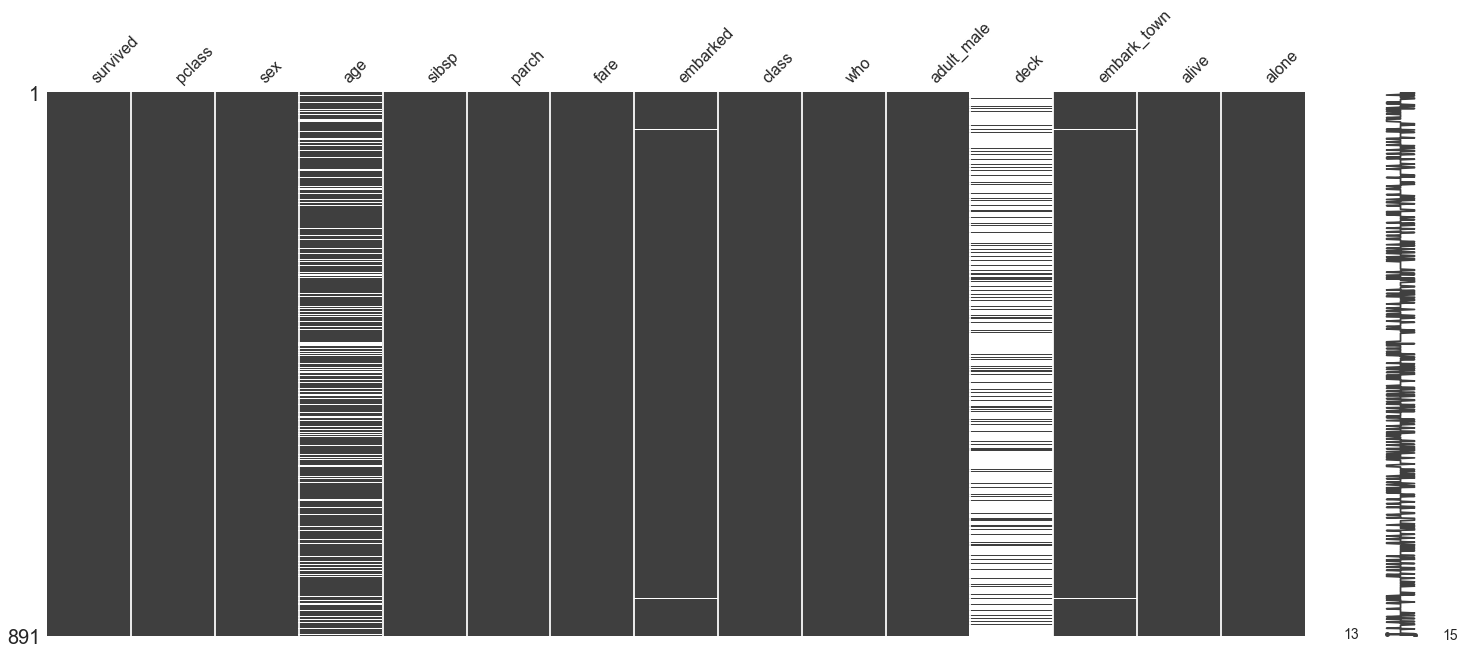

In [18]:
msno.matrix(titanic)

The white lines show us the missing data. One quick observation is the `deck` has a lot of missing data. Let's just go ahead and drop that column from the dataset since it's not relevant.

In [9]:
titanic.drop('deck', axis=1, inplace=True)

Now let's rerun the matrix and see. All that white is gone! Nice.

We still have a bunch of missing values for the age field. We can't just drop the age column since it is a pretty important datapoint. One way to deal with this is simply to just remove the records with missing information with `dropna()`, but this would end up removing out a significant amount of our data. 

What do we do now? We can now explore a technique called `missing value imputation`. What this means is basically we find a reasonable way to *replace* the unknown data with workable values. 

There's a lot of theory regarding how to do this properly, ([for the curious look here](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)). We can simply put in the average age value for the missing ages. But this really isn't so great, and would skew our stats.

If we assume that the data is missing *at random* (which actually is rarely the case and very hard to prove), we can just fit a model to predict the missing value based on the other available factors. One popular way to do this is to use KNN (where you look at the nearest datapoints to a certain point to conclude the missing value), but we can also use deep neural networks to achieve this task.  

You must now make you own decision on how to deal with the missing data. You may choose any of the methods discussed above. Easiest would be to fill in with average value (but this will skew our visualizations) (if you use pandas correctly, you can do this in one line - try looking at pandas documentation!). After writing your code, verify the result by rerunning the matrix.

In [15]:
## YOUR CODE HERE
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic.dropna(inplace=True)

As we learned in lecture, we have to Standardize our numerical data points that are non-binary Now you must create a function that standardizes the column given, and then pass in the correct columns

In [ ]:
def Standardize(data):

    data[1] = data[1] - data.avg()
    data[1] = data[1] / data[1].max()
    
    return data



In [46]:
def toBinary(data, positive):
    for i in range(data.shape[0] - 1):
   # get row contents as series and index position of row
        if data.iloc[i] == positive or data.iloc[i] == 1:
            data.iloc[i] = 1
            
        else:
            data.iloc[i] = 0
    return data
        
titanic['alive'] = toBinary(titanic['alive'], 'yes')

titanic.head()

891


/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True


## Intro to Seaborn

There are 2 types of data in any dataset: categorial and numerical data. We will first explore categorical data.

One really easy way to show categorical data is through bar plots. Let's explore how to make some in seaborn.
We want to investigate the difference in rates at which males vs females survived the accident. Using the [documentation here](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [example here](http://seaborn.pydata.org/examples/color_palettes.html), create a `barplot` to depict this. It should be a really simple one-liner.

We will show you how to do this so you can get an idea of how to use the API.

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


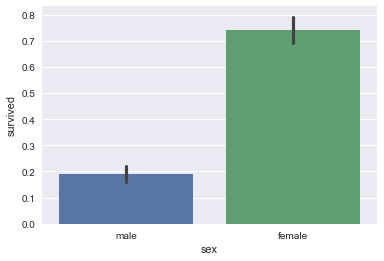

In [20]:
sns.barplot(x='sex', y='survived', data=titanic)


Notice how it was so easy to create the plot! You simply passed in the entire dataset, and just specified the `x` and `y` fields that you wanted exposed for the barplot. Behind the scenes seaborn ignored `NaN` values for you and automatically calculated the survival rate to plot. Also, that black tick is a 95% confidence interval that seaborn plots.

So we see that females were much more likely to make it out alive. What other factors do you think could have an impact on surival rate? Plot a couple more barplots below. Make sure to use *categorical* values, not something numerical like age or fare.

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


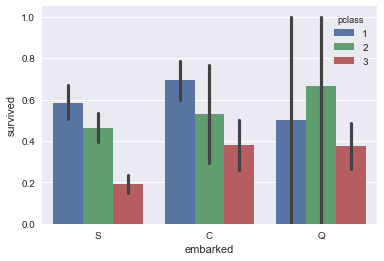

In [36]:
## YOUR CODE HERE
sns.barplot(x='embarked', y='survived', hue='pclass', data=titanic)

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


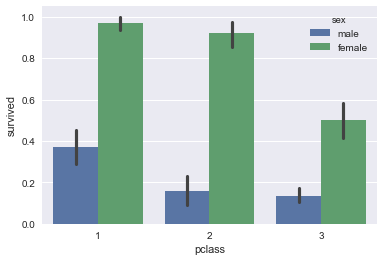

In [24]:
## YOUR CODE HERE
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic)

What if we wanted to add a further sex breakdown for the categories chosen above? Go back and add a `hue='sex'` parameter for the couple plots you just created, and seaborn will split each bar into a male/female comparison.

Now we want to compare the embarking town vs the age of the individuals. We don't simply want to use a barplot, since that will just give the average age; rather, we would like more insight into the relative and numeric *distribution* of ages.

A good tool to help us here is [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). Use this function to view `embark_town` vs `age`, again using `sex` as the `hue`.

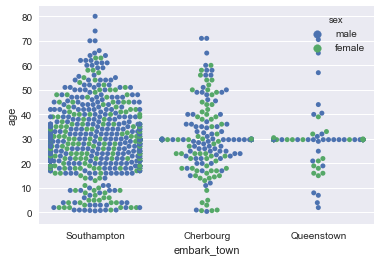

In [29]:
## YOUR CODE HERE
sns.swarmplot(x='embark_town', y='age', hue='sex', data=titanic)

Cool! This gives us much more information. What if we didn't care about the number of individuals in each category at all, but rather just wanted to see the *distribution* in each category? [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) plots a density distribution. Plot that. Keep the `hue`.

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


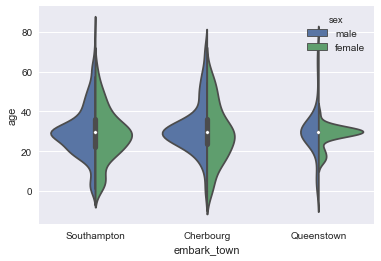

In [33]:
## YOUR CODE HERE
sns.violinplot(x='embark_town', y='age', hue='sex', split='True', data=titanic)

Go back and clean up the violinplot by adding `split='True'` parameter. 

Now take a few seconds to look at the graphs you've created of this data. What are some observations? Jot a couple down here.

Queenstown is the only embarking place from where more people from passenger class 2 survived than from passenger class 1. It also had a really young population so that might have something to do. 
<br> 
<br>

The most people embarked in south hampton but the survival rate for people who embaraked there was one of the lowest.

As I mentioned, data is categorical or numeric. We already started getting into numerical data with the swarmplot and violinplot. We will now explore a couple more examples.

Let's look at the distribution of ages. Use [`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) to make a histogram of just the ages.

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


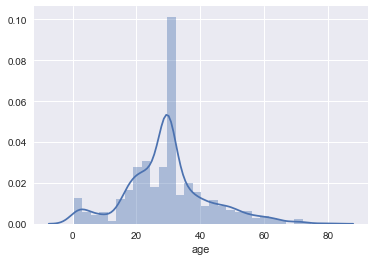

In [87]:
sns.distplot(titanic['age']) # How do I make all values equal to 30 not show up

If you did your missing value imputation by average value, your results will look very skewed. This is why we don't normally just fill in an average. As a quick fix for now, though, you can filter out the age values that equal the mean before passing it in to `displot`. Do this.

A histogram can nicely represent numerical data by breaking up numerical ranges into chunks so that it is easier to visualize. As you might notice from above, seaborn also automatically plots a gaussian kernel density estimate.

Do the same thing for fares - do you notice something odd about that histogram? What does that skew mean?

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


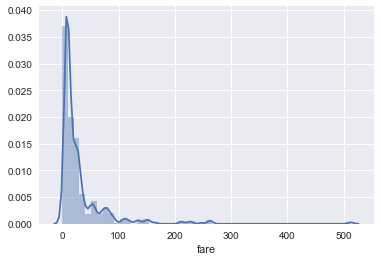

In [78]:
sns.distplot(titanic['fare'])

Now, using the [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) function, make a scatterplot of the `age` and `fare` variables to see if there is any relationship between the two.

/Users/alfredoanderejr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


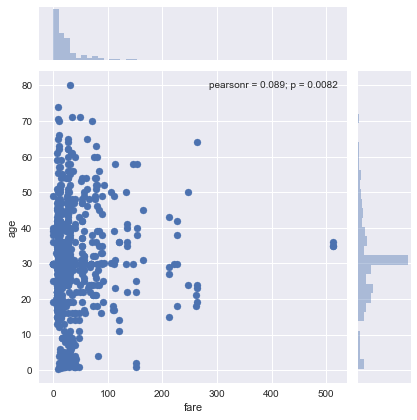

In [51]:
sns.jointplot(x='fare', y='age', data=titanic)

Scatterplots allow one to easily see trends/coorelations in data. As you can see here, there seems to be very little correlation. Also observe that seaborn automatically plots histograms.

Now, use a seaborn function we haven't used yet to plot something. The [API](http://seaborn.pydata.org/api.html) has a list of all the methods.

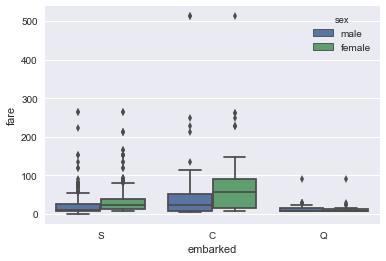

In [73]:
## YOUR CODE HERE
sns.boxplot(x='embarked', y='fare', hue='sex', data=titanic)